# Coursera Capstone Project: Car Accident Severity

In [36]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [3]:
# Importing Dataset
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Select potential features of interest (along with severity code (outcome) and key for each report)
df_possiblefeatures = df[["SEVERITYCODE","OBJECTID", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING"]]

feature_counts = df_possiblefeatures.count()
print(feature_counts)

SEVERITYCODE      194673
OBJECTID          194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SPEEDING            9333
dtype: int64


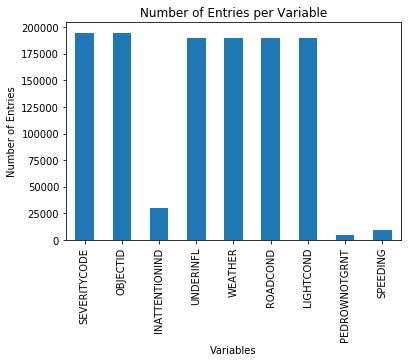

In [5]:
feature_counts.plot(kind='bar')
plt.title('Number of Entries per Variable')
plt.xlabel("Variables")
plt.ylabel("Number of Entries")
plt.show()

In [6]:
# drop columns with too few values
df_features = df_possiblefeatures.drop(columns = ['INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING'])

In [7]:
df_features.dtypes

SEVERITYCODE     int64
OBJECTID         int64
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [8]:
# convert object types to int types

# Encode UNDERINFL
df_features["UNDERINFL"].replace("N", 0, inplace=True)
df_features["UNDERINFL"].replace("Y", 1, inplace=True)
df_features["UNDERINFL"].replace("0", 0, inplace=True)
df_features["UNDERINFL"].replace("1", 1, inplace=True)

# Encode WEATHER
# 0 = Clear  1 = Overcast, Partly Cloudy  2 = Raining, Snowing, Fog/Smog/Smoke, Sleet/Hail/Freezing Rain, Blowing Sand/Dirt, Severe Crosswind
df_features["WEATHER"].replace("Overcast", 1, inplace=True)
df_features["WEATHER"].replace("Raining", 2, inplace=True)
df_features["WEATHER"].replace("Clear", 0, inplace=True)
df_features["WEATHER"].replace("Snowing", 2, inplace=True)
df_features["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df_features["WEATHER"].replace("Sleet/Hail/Freezing Rain", 2, inplace=True)
df_features["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df_features["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df_features["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
df_features["WEATHER"].replace("Other", np.nan, inplace=True)
df_features["WEATHER"].replace("Unknown", np.nan, inplace=True)

# Encode ROADCOND
# 0 = Dry  1 = Wet,Sand/Mud/Dirt,Oil  2 = Snow/Slush, Ice, Standing Water
df_features["ROADCOND"].replace("Dry", 0, inplace=True)
df_features["ROADCOND"].replace("Wet", 1, inplace=True)
df_features["ROADCOND"].replace("Snow/Slush", 2, inplace=True)
df_features["ROADCOND"].replace("Ice", 2, inplace=True)
df_features["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df_features["ROADCOND"].replace("Standing Water", 2, inplace=True)
df_features["ROADCOND"].replace("Oil", 1, inplace=True)
df_features["ROADCOND"].replace("Other", np.nan, inplace=True)
df_features["ROADCOND"].replace("Unknown", np.nan, inplace=True)

# Encode LIGHTCOND
# 0 = Daylight  1 = Dark - Street Lights On, Dusk, Dawn  2 = Dark - No Street Lights, Street Lights Off, Unknown Lighting
df_features["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df_features["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df_features["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df_features["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df_features["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df_features["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df_features["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df_features["LIGHTCOND"].replace("Unknown", np.nan, inplace=True)
df_features["LIGHTCOND"].replace("Other", np.nan, inplace=True)

In [9]:
# Interpolate NaN values
df_features["UNDERINFL"].interpolate(method = 'pad', inplace = True)
df_features["WEATHER"].interpolate(method = 'pad', inplace = True)
df_features["ROADCOND"].interpolate(method = 'pad', inplace = True)
df_features["LIGHTCOND"].interpolate(method = 'pad', inplace = True)

In [10]:
#split data into severe and minor accidents
df_severe = df_features.loc[df_features["SEVERITYCODE"] == 2]
df_minor = df_features.loc[df_features["SEVERITYCODE"] == 1]

Text(0.5, 0.98, 'Sobriety')

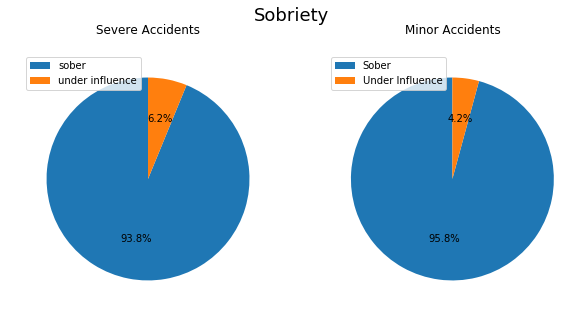

In [11]:
# Sobriety
fig = plt.figure(1)

plt.subplot(1,2,1)
underinfl_pie=df_severe['UNDERINFL'].value_counts()
underinfl_pie.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Severe Accidents', fontsize=12, y=1.05)
plt.legend(labels=["sober", "under influence"])
plt.axis('off')

plt.subplot(1,2,2)
underinfl_pie2=df_minor['UNDERINFL'].value_counts()
underinfl_pie2.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Minor Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Sober", "Under Influence"])
plt.axis('off')
fig.suptitle('Sobriety', fontsize=18)

Text(0.5, 0.98, 'Weather Condition')

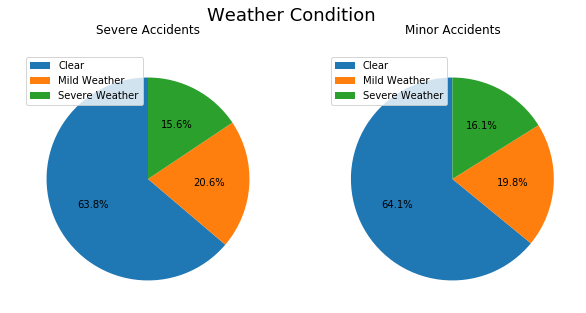

In [12]:
# Weather
fig = plt.figure(1)

plt.subplot(1,2,1)
weather_pie=df_severe['WEATHER'].value_counts()
weather_pie.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Severe Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Clear", "Mild Weather", "Severe Weather"])
plt.axis('off')

plt.subplot(1,2,2)
weather_pie2=df_minor['WEATHER'].value_counts()
weather_pie2.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Minor Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Clear", "Mild Weather", "Severe Weather"])
plt.axis('off')
fig.suptitle('Weather Condition', fontsize=18)

Text(0.5, 0.98, 'Road Condition')

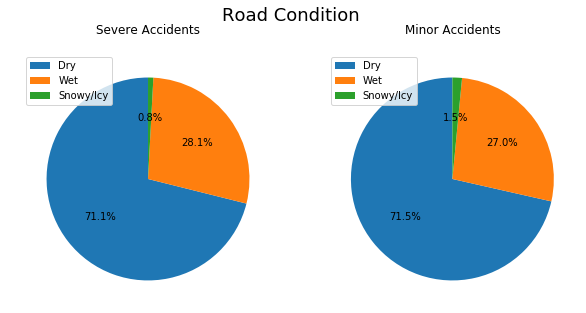

In [13]:
# Road Conditions
fig = plt.figure(1)

plt.subplot(1,2,1)
road_pie=df_severe['ROADCOND'].value_counts()
road_pie.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Severe Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Dry", "Wet", "Snowy/Icy"])
plt.axis('off')

plt.subplot(1,2,2)
road_pie2=df_minor['ROADCOND'].value_counts()
road_pie2.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Minor Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Dry", "Wet", "Snowy/Icy"])
plt.axis('off')
fig.suptitle('Road Condition', fontsize=18)

Text(0.5, 0.98, 'Light Condition')

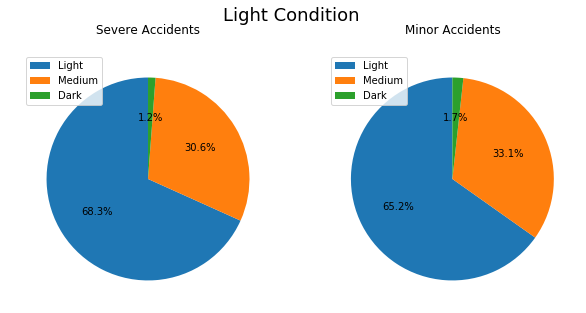

In [14]:
# Light Conditions
fig = plt.figure(1)

plt.subplot(1,2,1)
light_pie=df_severe['LIGHTCOND'].value_counts()
light_pie.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Severe Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Light", "Medium", "Dark"])
plt.axis('off')

plt.subplot(1,2,2)
light_pie2=df_minor['LIGHTCOND'].value_counts()
light_pie2.plot(kind='pie',
            figsize=(10, 5),
            autopct='%1.1f%%',
            startangle=90,
            labels = None)
plt.title('Minor Accidents', fontsize=12, y=1.05)
plt.legend(labels=["Light", "Medium", "Dark"])
plt.axis('off')

fig.suptitle('Light Condition', fontsize=18)

In [19]:
# Prepare and normalize Data
x=df_features[["UNDERINFL","WEATHER", "ROADCOND", "LIGHTCOND"]].values
y=df_features[["SEVERITYCODE"]].values.ravel()

x= preprocessing.StandardScaler().fit(x).transform(x)

In [20]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [24]:
# train model with the training set and predict values for the test set for a range of k values
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

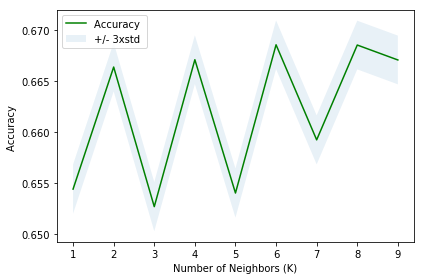

The best accuracy was with 0.6685758315140619 with k= 6


In [25]:
# Plot graph of accuracy for a range of k values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
# generate best classifier
knn_best = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat=neigh.predict(X_test)

In [34]:
# print claassification repot
print (classification_report(y_test, yhat))

Accuracy 0.667086169256453
              precision    recall  f1-score   support

           1       0.71      0.90      0.79     27425
           2       0.31      0.10      0.15     11510

   micro avg       0.67      0.67      0.67     38935
   macro avg       0.51      0.50      0.47     38935
weighted avg       0.59      0.67      0.60     38935



In [38]:
# K Nearest Neighbor Evaluation
knn_jacc = jaccard_similarity_score(y_test, yhat)
knn_f1score = f1_score(y_test, yhat, average='weighted', labels=np.unique(yhat))

In [40]:
# Create a Decision Tree Classifier 
AccidentTree = DecisionTreeClassifier(criterion="entropy")

# Train on training set
AccidentTree.fit(X_train,y_train)

# Predict on test set
yhat_decisiontree = AccidentTree.predict(X_test)

# print accuracy score
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_decisiontree))

# print claassification repot
print(classification_report(y_test, yhat_decisiontree))

DecisionTrees's Accuracy:  0.7043277256966739
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27425
           2       0.45      0.00      0.00     11510

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.58      0.50      0.41     38935
weighted avg       0.63      0.70      0.58     38935



In [41]:
# Decision Tree Evaluation
DT_jacc = jaccard_similarity_score(y_test, yhat_decisiontree)
DT_f1score = f1_score(y_test, yhat_decisiontree, average='weighted', labels=np.unique(yhat_decisiontree))

In [42]:
# Create a LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')

# Train on training set
LR.fit(X_train,y_train)

# Predict on test set
yhat_logreg = LR.predict(X_test)

# print accuracy score
print("Logistic Regressions's Accuracy: ", metrics.accuracy_score(y_test, yhat_logreg))

# print claassification repot
print(classification_report(y_test, yhat_logreg))

Logistic Regressions's Accuracy:  0.7043790933607295
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27425
           2       0.00      0.00      0.00     11510

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.50      0.70      0.58     38935



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# Logistic Regression Evaluation
logreg_jacc = jaccard_similarity_score(y_test, yhat_logreg)
logreg_f1score = f1_score(y_test, yhat_logreg,average='weighted', labels=np.unique(yhat_logreg))
logreg_yhat_prob = LR.predict_proba(X_test)
logreg_logloss = log_loss(y_test, logreg_yhat_prob)

In [46]:
# Final Evaluation
column_names = ["Algorithm", "Jaccard", "F1-score", "LogLoss"]
report_data = [["KNN", knn_jacc, knn_f1score, "NA"], ["Decision Tree", DT_jacc, DT_f1score, "NA"], ["Logistic Regression", logreg_jacc, logreg_f1score, logreg_logloss]]
df_report = pd.DataFrame(report_data,columns = column_names)
df_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.667086,0.603606,NA
1,Decision Tree,0.704328,0.582609,NA
2,Logistic Regression,0.704379,0.826552,0.605406
